In [380]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [381]:
base = pd.read_csv('train.csv')
base

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [382]:
def verifyNull():
  null_data = base.isnull().sum()
  print("Total: ", len(null_data))
  print("Total de colunas com info nulls: ", len(null_data[null_data>0]))
  return null_data[null_data>0]
verifyNull()

Total:  81
Total de colunas com info nulls:  19


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [383]:
base['LotFrontage'] = base['LotFrontage'].fillna(base['LotFrontage'].mean)
base['Alley'] = base['Alley'].fillna('Grvl')
base['MasVnrType'] = base['MasVnrType'].fillna('BrkFace')
base['MasVnrArea'] = base['MasVnrArea'].fillna(0)
base['BsmtQual'] = base['BsmtQual'].fillna('TA')
base['BsmtCond'] = base['BsmtCond'].fillna('TA')
base['BsmtExposure'] = base['BsmtExposure'].fillna('No')
base['BsmtFinType1'] = base['BsmtFinType1'].fillna(base['BsmtFinType1'].mode()[0])
base['BsmtFinType2'] = base['BsmtFinType2'].fillna(base['BsmtFinType2'].mode()[0])
base['Electrical'] = base['Electrical'].fillna(base['Electrical'].mode()[0])
base['FireplaceQu'] = base['FireplaceQu'].fillna(base['FireplaceQu'].mode()[0])
base['GarageType'] = base['GarageType'].fillna(base['GarageType'].mode()[0])
base['GarageYrBlt'] = base['GarageYrBlt'].fillna(base['GarageYrBlt'].mode()[0])
base['GarageFinish'] = base['GarageFinish'].fillna(base['GarageFinish'].mode()[0])
base['GarageQual'] = base['GarageQual'].fillna(base['GarageQual'].mode()[0])
base['GarageCond'] = base['GarageCond'].fillna(base['GarageCond'].mode()[0])
base['PoolQC'] = base['PoolQC'].fillna(base['PoolQC'].mode()[0])
base['Fence'] = base['Fence'].fillna(base['Fence'].mode()[0])
base['MiscFeature'] = base['MiscFeature'].fillna(base['MiscFeature'].mode()[0])

In [384]:
verifyNull()

Total:  81
Total de colunas com info nulls:  0


Series([], dtype: int64)

In [385]:
prevision = base.iloc[:, 0:len(base.columns) - 1].values
classe = base.iloc[:, len(base.columns) - 1].values.astype(float)

In [386]:
def encode_categorical_columns(data):
    labelEncoder = LabelEncoder()
    n_cols = data.shape[1]
    
    for col in range(n_cols):
        if isinstance(data[0, col], str):  # Se o dado for categórico
            data[:, col] = labelEncoder.fit_transform(data[:, col])
        else:
            # Convert to float if not already numeric
            data[:, col] = pd.to_numeric(data[:, col], errors='coerce')

    # Convert data to float after encoding
    data = data.astype(float)
    return data

prevision = encode_categorical_columns(prevision)

prevision

array([[1.000e+00, 6.000e+01, 3.000e+00, ..., 2.008e+03, 8.000e+00,
        4.000e+00],
       [2.000e+00, 2.000e+01, 3.000e+00, ..., 2.007e+03, 8.000e+00,
        4.000e+00],
       [3.000e+00, 6.000e+01, 3.000e+00, ..., 2.008e+03, 8.000e+00,
        4.000e+00],
       ...,
       [1.458e+03, 7.000e+01, 3.000e+00, ..., 2.010e+03, 8.000e+00,
        4.000e+00],
       [1.459e+03, 2.000e+01, 3.000e+00, ..., 2.010e+03, 8.000e+00,
        4.000e+00],
       [1.460e+03, 2.000e+01, 3.000e+00, ..., 2.008e+03, 8.000e+00,
        4.000e+00]])

In [387]:
verifyNull()

Total:  81
Total de colunas com info nulls:  0


Series([], dtype: int64)

In [388]:
x_train, x_test, y_train, y_test = train_test_split(prevision, classe, random_state=0, test_size=0.2)

In [389]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [390]:
np.isnan(x_train).any()
np.isnan(x_test).any()

True

In [391]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') 
x_train = imputer.fit_transform(x_train)
x_test = imputer.fit_transform(x_test)
x_train

array([[-0.28399978, -0.86836547, -0.04613454, ..., -0.61356151,
        -1.02837162,  1.12162592],
       [ 0.31396549, -0.86836547, -0.04613454, ...,  0.88411842,
         0.30696807,  0.19969835],
       [-1.53213363, -0.63114155, -0.04613454, ...,  0.88411842,
         0.30696807,  0.19969835],
       ...,
       [ 1.13498129,  0.79220197,  1.53872269, ...,  1.63295838,
         0.30696807,  0.19969835],
       [-0.42399958,  1.50387373, -0.04613454, ..., -1.36240148,
         0.30696807,  0.19969835],
       [-0.12738983,  0.08053021, -0.04613454, ...,  1.63295838,
         0.30696807,  0.19969835]])

In [392]:

modelo = LinearRegression()
modelo = modelo.fit(x_train, y_train)
modelo

LinearRegression()

In [393]:
modelo.intercept_ + modelo.coef_ * x_test

array([[180682.0548048 , 184598.10819457, 180837.43607919, ...,
        181737.24882885, 180501.59676557, 174141.92811774],
       [180660.15625838, 181487.25407863, 180837.43607919, ...,
        182878.3165945 , 180501.59676557, 181611.28264375],
       [180641.71537719, 181487.25407863, 180837.43607919, ...,
        179455.11329754, 180501.59676557, 181611.28264375],
       ...,
       [181176.50093189, 181487.25407863, 179630.94901669, ...,
        181737.24882885, 185080.14109936, 177876.60538074],
       [181139.6191695 , 183561.15682259, 180837.43607919, ...,
        179455.11329754, 180501.59676557, 181611.28264375],
       [180412.3569173 , 178894.87564869, 179630.94901669, ...,
        181737.24882885, 180501.59676557, 181611.28264375]])

In [394]:
modelo.coef_
#Onde a linha irá tocar
modelo.intercept_

180802.3157366128

In [395]:
prevision = modelo.predict(x_test)
prevision

array([ 216514.31573661,  174450.31573661,  101286.31573661,
        215254.31573661,   93282.31573661,   81858.31573661,
        240446.31573661,  140618.31573661,  436146.31573661,
        159842.31573661,  197634.31573661,  -58653.68426339,
        242650.31573661,  110738.31573661,  126984.31573661,
        138368.31573661,  234010.31573661,  108550.31573661,
        132018.31573661,  177010.31573661,  141722.31573661,
        161138.31573661,   75666.31573661,  149634.31573661,
        204254.31573661,  198494.31573661,  175210.31573661,
         60802.31573661,  351690.31573661,  110362.31573661,
        134114.31573661,  218306.31573661,  145666.31573661,
        280657.31573661,  311298.31573661,  185474.31573661,
        304742.31573661,  109098.31573661,  227326.31573661,
        339986.31573661,  212354.31573661,   92530.31573661,
        200154.31573661,  300306.31573661,  333154.31573661,
        130274.31573661, -132141.68426339,  116258.31573661,
        175890.31573661,

In [396]:

mse = mean_squared_error(y_test, prevision)
r2 = r2_score(y_test, prevision)
print(r2)
print(mse)


0.5379020823463998
3191178887.994237


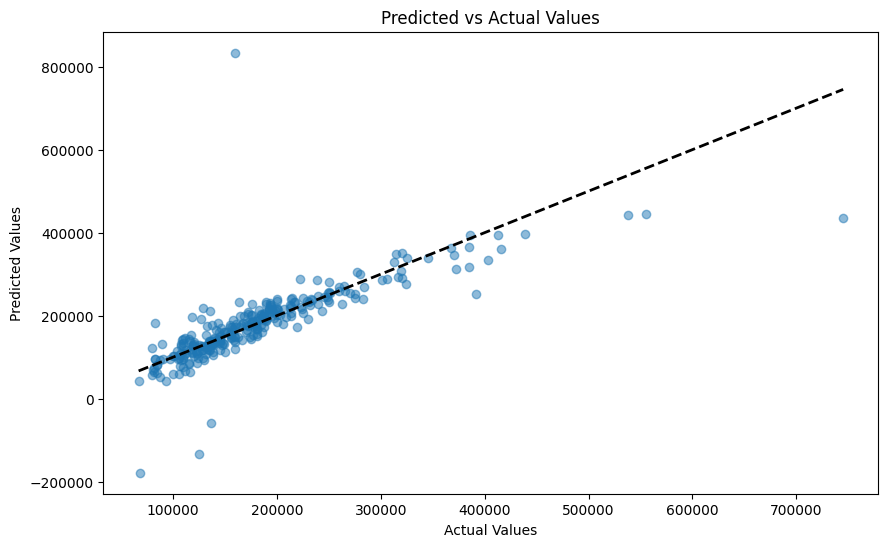

In [397]:

# Scatter Plot: Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, prevision, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

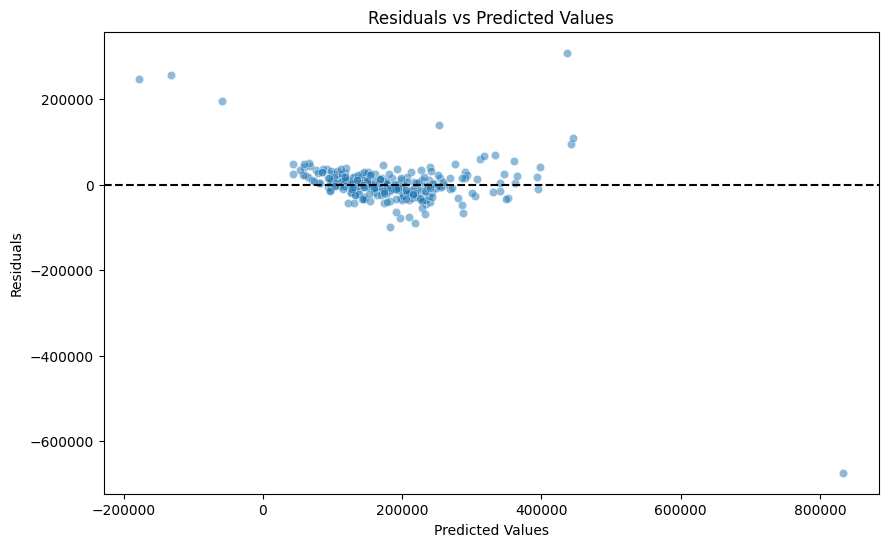

In [398]:
# Residual Plot
residuals = y_test - prevision

plt.figure(figsize=(10, 6))
sns.scatterplot(x=prevision, y=residuals, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()